# Volume 3: Pandas 2 (Plotting)
    Nathan Kibanoff
    BUDS Training Program
    19 August 2019

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from pydataset import data
%matplotlib inline

# Problem 1
Create 3 visualizations for the data in *final_accidents2.pickle* and *final_drivers.pickle*. 
Make one of the visualizations a histogram and one visualization a scatter matrix.
The visualizations should be well labeled and easy to understand.
Include a short description of your plots.

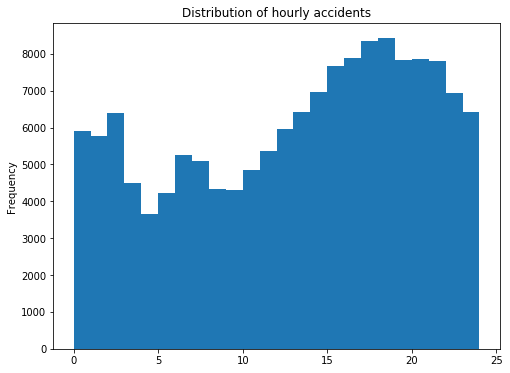

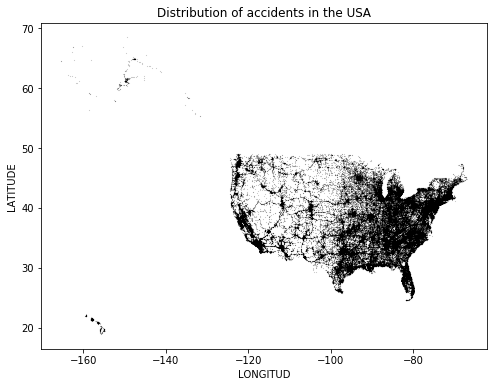

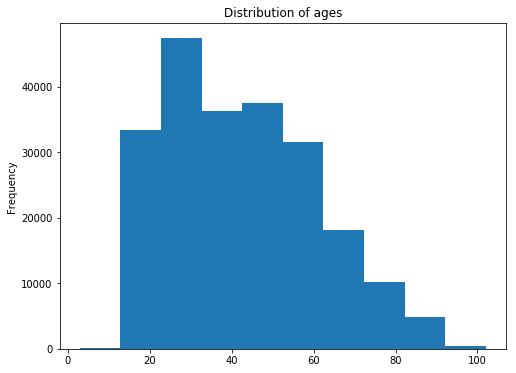

In [4]:
accidents=pd.read_pickle("final_accidents2.pickle")
drivers=pd.read_pickle("final_drivers.pickle")
accidents["HOUR"].plot(kind="hist",bins=np.arange(0,25),figsize=(8,6),title="Distribution of hourly accidents")
accidents.plot(kind="scatter",x="LONGITUD",y="LATITUDE",s=0.005,c="black",figsize=(8,6),title="Distribution of accidents in the USA")
drivers[drivers["AGE"]<200][["AGE"]].plot(kind="hist",figsize=(8,6),legend=False,title="Distribution of ages")

print("The three plots show a distribution of accidents across the hours per day, their location, and the age of people involved")

# Problem 2
Using the accident data from the previous problem, identify if a trend exists between FATALS and the following variables:
1. WEATHER
2. DRINKING
3. SP

Support each claim with a clear, labeled visualization and a short description of how the visualization supports your claim.

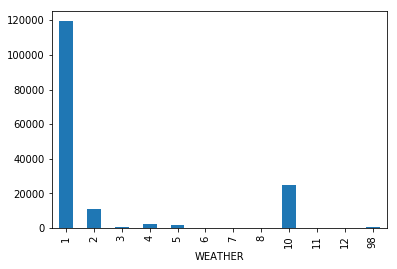

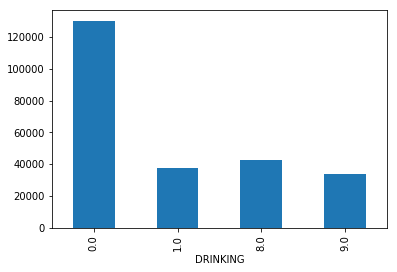

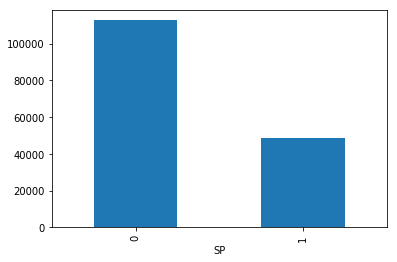

In [29]:
weather=accidents.pivot_table(index="WEATHER",values="FATALS",aggfunc="sum")
#weather
weather.plot(kind="bar",y="FATALS",legend=False,title="Fatalities per weather")

merged=pd.merge(accidents,drivers,on=["ST_CASE","YEAR"],how="outer")[["ST_CASE","DRINKING","FATALS"]].dropna()
drinking=merged.pivot_table(index="DRINKING",values="FATALS",aggfunc="sum")
drinking.plot(kind="bar",y="FATALS",legend=False,title="Fatalities per accident involving alcohol")

speed=accidents.pivot_table(index="SP",values="FATALS",aggfunc="sum")
speed.plot(kind="bar",y="FATALS",legend=False,title="Fatalities per accident involving speeding")

# Problem 3
Using the same data, display a distributional visualization, and provide a brief description and analysis on the following distributions: 

1. The distribution of accidents across the United States
2. The distribution of age in all accidents
3. The distribution of fatalities by the hour which the accident occurs

As usual, all plots should be labeled and easy to read.

Many accidents often occur on the eastern part of the USA with many 20-30 year olds being involved and they are more frequent in the late afternoon


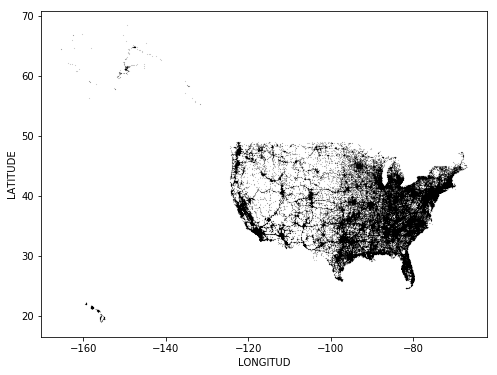

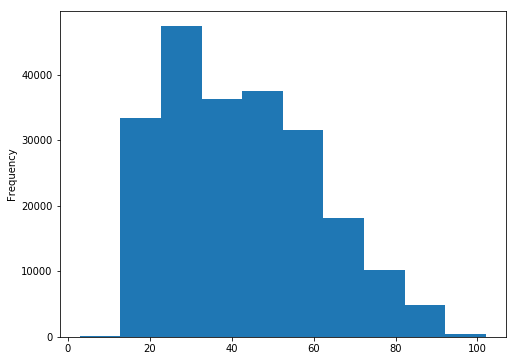

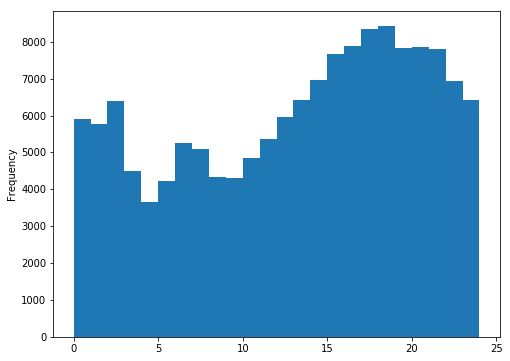

In [5]:
accidents.plot(kind="scatter",x="LONGITUD",y="LATITUDE",s=0.005,c="black",figsize=(8,6))
drivers[drivers["AGE"]<200][["AGE"]].plot(kind="hist",figsize=(8,6),legend=False)
accidents[["HOUR"]].plot(kind="hist",bins=np.arange(0,25),figsize=(8,6),legend=False)

print("Many accidents often occur on the eastern part of the USA with many 20-30 year olds being involved and they are more frequent in the late afternoon")

## Problem 4
The *pydataset* module contains numerous data sets, each stored as a pandas DataFrame.
Read data on road accident deaths in the United States using the data set *road* in the *pydataset* module.
Using this data, answer the following questions:

1. Does higher population density indicate higher fuel consumption?

2. Does a correlation exist between number of drivers and number of deaths in a state?

3. Does the temperature of a state in January affect its population density?

Support each claim with a visualization and make sure the visualizations are clearly labelled and easy to understand.
Include any citations provided by the data set.

(Hint: Consider how outliers may be skewing the data.)

For population densities < 200, there is a large increase in fuel consumption per increasing population density
There is a strong positive correlation between number of drivers and number of deaths
There is little to no correlation between temperature in January and population density


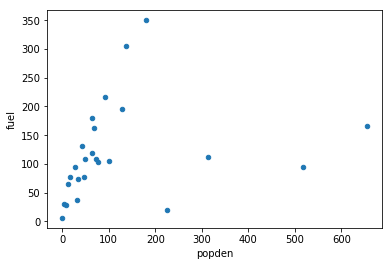

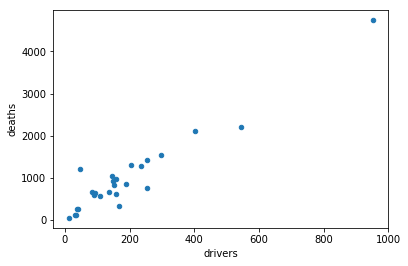

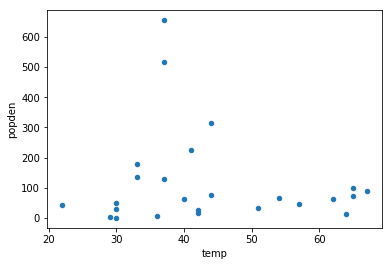

In [7]:
road=data("road")

road[road["popden"]<2000].plot(kind="scatter",x="popden",y="fuel")

road.plot(kind="scatter",x="drivers",y="deaths")

road[road["popden"]<2000].plot(kind="scatter",x="temp",y="popden")


print("For population densities < 200, there is a large increase in fuel consumption per increasing population density")
print("There is a strong positive correlation between number of drivers and number of deaths")
print("There is little to no correlation between temperature in January and population density")

## Problem 5
The file *new_york_crime_clean.csv* contains data on New York City crimes and felonies from 2000-2017 taken from https://www1.nyc.gov/site/nypd/stats/crime-statistics/historical.page.
Use this data to answer the following questions and give visualizations supporting each claim:

1. What are the most common and least common crimes?

2. Does a trend exist between robbery and drug felonies? If so, what is the trend?

3. Which crimes have had the largest distributions?

Use a different style of visualization for each question. 
Make sure that each plot is well labelled and contains citations.

(Hint: Use plt.axis('scaled') or plt.axis('square') to make sure x- and y-axis are the same.)

The most common crime is grand larceny, while the least common is murder and non-negligent manslaughter
There exists a strong positive correlation between robbery and drug felonies
Grand larceny of motor vehicles, buglary, and felony of dangerous drugs had the largest distributions


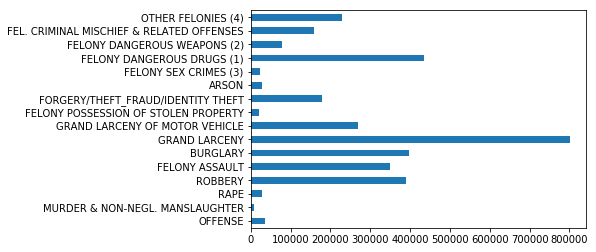

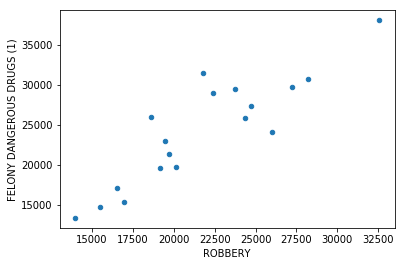

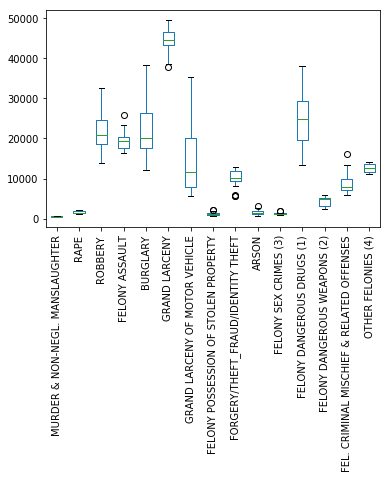

In [10]:
crime=pd.read_csv("new_york_crime_clean.csv")

np.sum(crime).plot(kind="barh")
crime.plot(kind="scatter",x="ROBBERY",y="FELONY DANGEROUS DRUGS (1)")
crime.plot(kind="box",y=list(crime.columns)[1:],rot=90)

print("The most common crime is grand larceny, while the least common is murder and non-negligent manslaughter")
print("There exists a strong positive correlation between robbery and drug felonies")
print("Grand larceny of motor vehicles, buglary, and felony of dangerous drugs had the largest distributions")